In [45]:
#hello change /n#hello change /n#hello change /nimport pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
df = pd.read_csv("Export.csv")
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Item Code (CPC),Item,Year,Unit,Import,Export,Production,Consumption
0,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2014,t,283.85,21099.0,21500.00,684.85
1,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2015,t,1000.16,17340.0,18000.00,1660.16
2,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2016,t,814.88,8353.0,17333.33,9795.21
3,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2017,t,3.67,8500.0,18234.12,9737.79
4,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2018,t,112.30,9456.0,17855.82,8512.12


In [46]:

df.columns = df.columns.str.strip()
print("Missing values in each column:")
print(df.isnull().sum())
df.fillna(0, inplace=True)
df['Year'] = df['Year'].astype(int)
df.rename(columns={
    'Area': 'Country',
    'Item': 'Product'
}, inplace=True)

Missing values in each column:
Domain Code        0
Domain             0
Area Code (M49)    0
Area               0
Element Code       0
Item Code (CPC)    0
Item               0
Year               0
Unit               0
Import             0
Export             0
Production         0
Consumption        0
dtype: int64


/var/folders/ln/zp0qdsls28jf_sbnjhccr9t80000gn/T/ipykernel_25196/3970864618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_exporters.values, y=top_exporters.index, palette='viridis')


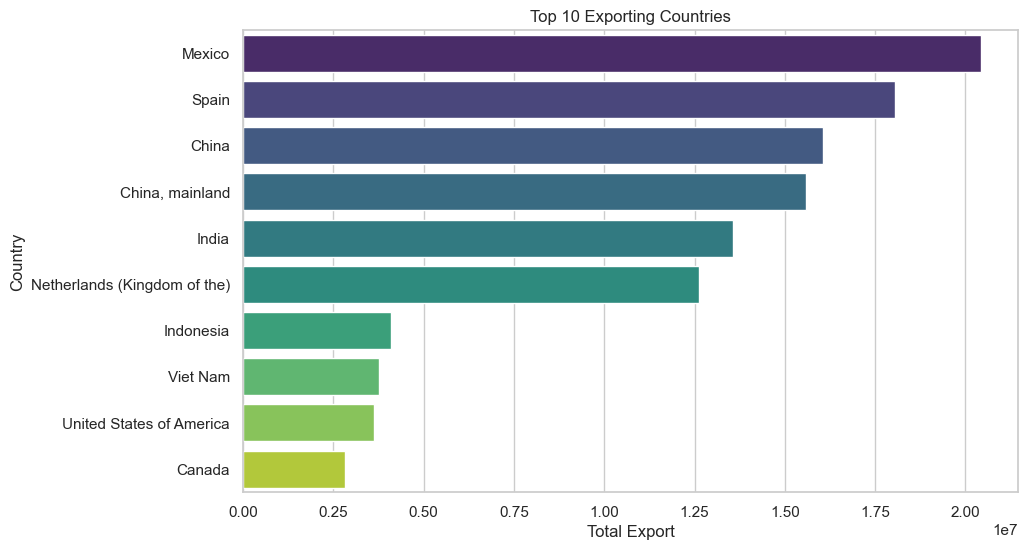

In [47]:
top_exporters = df.groupby('Country')['Export'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_exporters.values, y=top_exporters.index, palette='viridis')
plt.title('Top 10 Exporting Countries')
plt.xlabel('Total Export')
plt.ylabel('Country')
plt.show()

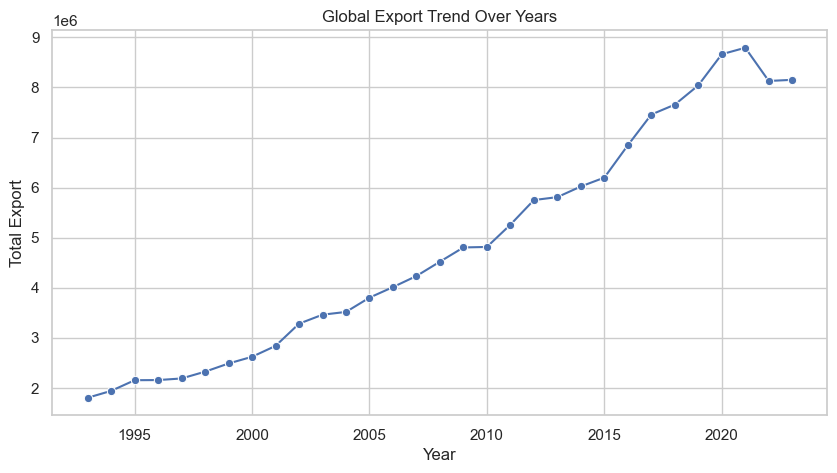

In [48]:
export_trend = df.groupby('Year')['Export'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=export_trend.index, y=export_trend.values, marker='o')
plt.title('Global Export Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Total Export')
plt.grid(True)
plt.show()

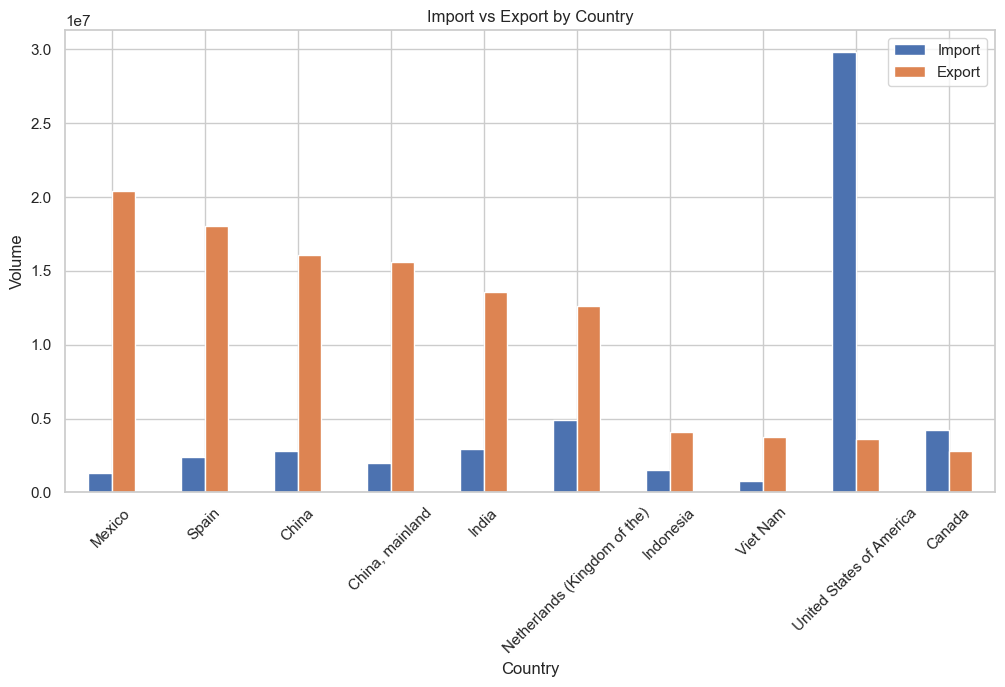

In [49]:
trade_summary = df.groupby('Country')[['Import', 'Export']].sum().sort_values(by='Export', ascending=False).head(10)

trade_summary.plot(kind='bar', figsize=(12,6))
plt.title('Import vs Export by Country')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

/var/folders/ln/zp0qdsls28jf_sbnjhccr9t80000gn/T/ipykernel_25196/226977527.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette='cubehelix')


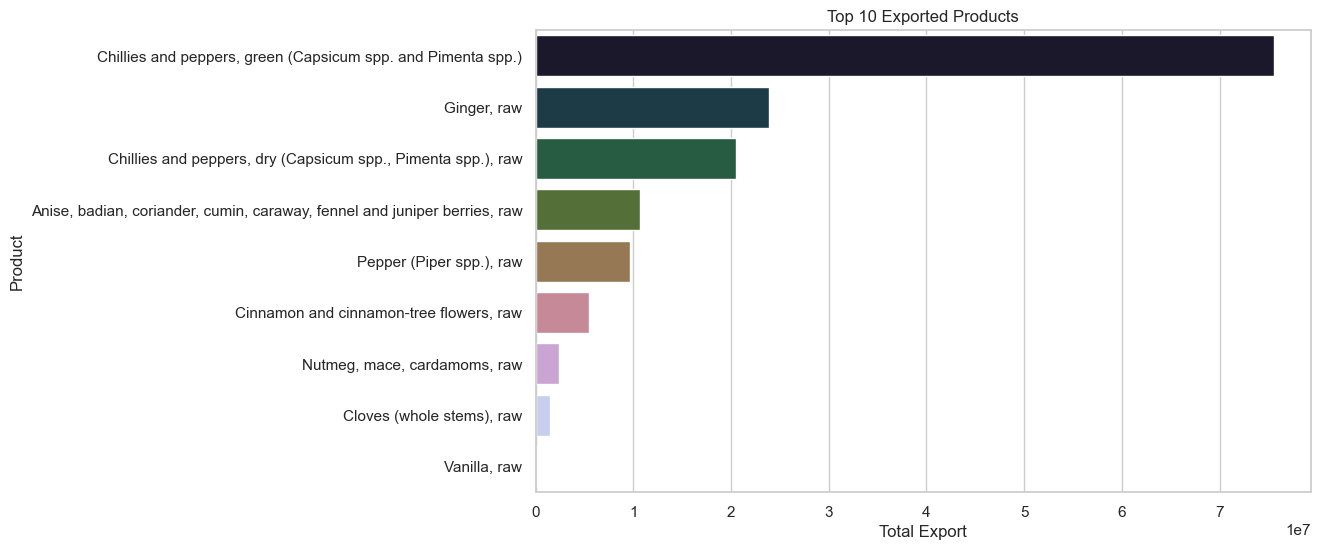

In [50]:
top_items = df.groupby('Product')['Export'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_items.values, y=top_items.index, palette='cubehelix')
plt.title('Top 10 Exported Products')
plt.xlabel('Total Export')
plt.ylabel('Product')
plt.show()

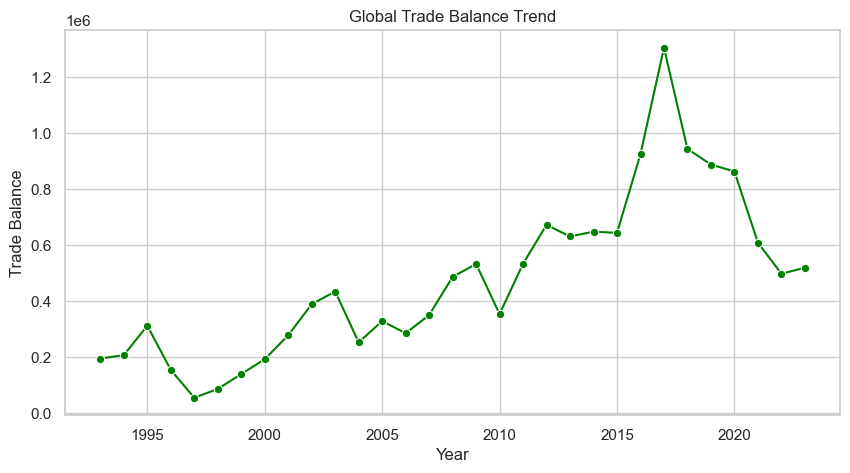

In [51]:
df['TradeBalance'] = df['Export'] - df['Import']
trade_balance = df.groupby('Year')['TradeBalance'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=trade_balance.index, y=trade_balance.values, marker='o', color='green')
plt.title('Global Trade Balance Trend')
plt.xlabel('Year')
plt.ylabel('Trade Balance')
plt.grid(True)
plt.show()